In [325]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [327]:
#Data
db = pd.read_csv("Mental_Health_Lifestyle_Dataset.csv")

In [329]:
db.shape

(3000, 12)

In [331]:
db.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,40.256667,6.980476,39.628277,5.491850,5.461297,4.424718
std,11.803215,1.152059,11.496296,2.559484,2.639387,1.204530
min,20.000000,5.000047,20.009640,1.000475,1.001420,0.247286
25%,30.000000,5.995818,29.669524,3.294396,3.135454,3.593988
50%,41.000000,6.953347,39.448593,5.480798,5.369779,4.422260
75%,51.000000,7.969247,49.445794,7.661713,7.819370,5.265569
max,60.000000,8.998231,59.978427,9.997059,9.994016,8.190960


In [333]:
db.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Germany,58,other,low,vegan,5.320720,high,depression,23.653029,2.618180,4.447591,3.794993
1,Germany,48,male,low,omnivore,6.419085,medium,none,26.457907,5.209824,8.844552,4.517077
2,Australia,34,other,low,vegetarian,8.766903,high,ptsd,58.429852,9.712653,4.268158,3.756043
3,India,27,other,low,vegetarian,7.674291,medium,depression,41.501606,7.776876,9.564432,5.928862
4,Brazil,40,female,high,balanced,7.714680,high,none,20.567865,8.300463,9.516780,5.698869


In [335]:
db.tail()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
2995,Canada,47,male,medium,vegetarian,7.283416,medium,anxiety,39.454884,2.604098,9.888362,6.540271
2996,Germany,59,male,low,omnivore,8.638382,medium,ptsd,38.504771,8.732640,4.352203,4.841580
2997,India,39,other,high,omnivore,5.024735,high,depression,51.402874,4.631705,5.118640,3.260600
2998,Brazil,52,male,low,vegan,8.242734,low,depression,52.863108,4.586893,3.921208,4.156127
2999,Brazil,31,male,low,vegetarian,8.793478,low,depression,42.179565,2.528980,2.645989,5.190876


In [339]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      3000 non-null   object 
 8   Work Hours per Week          3000 non-null   float64
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 281.4+ KB


In [343]:
print(db.columns.tolist())

['Country', 'Age', 'Gender', 'Exercise Level', 'Diet Type', 'Sleep Hours', 'Stress Level', 'Mental Health Condition', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']


In [345]:
#Clean whitespaces from columns names
db.columns = db.columns.str.strip()
print(db.columns.tolist())

['Country', 'Age', 'Gender', 'Exercise Level', 'Diet Type', 'Sleep Hours', 'Stress Level', 'Mental Health Condition', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']


In [347]:
for col in db.select_dtypes('object'):
    db[col] = db[col].str.strip()

In [355]:
db.isnull().sum()

Country                        0
Age                            0
Gender                         0
Exercise Level                 0
Diet Type                      0
Sleep Hours                    0
Stress Level                   0
Mental Health Condition        0
Work Hours per Week            0
Screen Time per Day (Hours)    0
Social Interaction Score       0
Happiness Score                0
dtype: int64

In [353]:
db.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Germany,58,other,low,vegan,5.320720,high,depression,23.653029,2.618180,4.447591,3.794993
1,Germany,48,male,low,omnivore,6.419085,medium,none,26.457907,5.209824,8.844552,4.517077
2,Australia,34,other,low,vegetarian,8.766903,high,ptsd,58.429852,9.712653,4.268158,3.756043
3,India,27,other,low,vegetarian,7.674291,medium,depression,41.501606,7.776876,9.564432,5.928862
4,Brazil,40,female,high,balanced,7.714680,high,none,20.567865,8.300463,9.516780,5.698869


In [369]:
db.drop_duplicates(inplace=True)

In [371]:
db.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [349]:
#Numeric variables
db_num = db.select_dtypes(include=['number'])

In [351]:
db_num

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,58,5.320720,23.653029,2.618180,4.447591,3.794993
1,48,6.419085,26.457907,5.209824,8.844552,4.517077
2,34,8.766903,58.429852,9.712653,4.268158,3.756043
3,27,7.674291,41.501606,7.776876,9.564432,5.928862
4,40,7.714680,20.567865,8.300463,9.516780,5.698869
...,...,...,...,...,...,...
2995,47,7.283416,39.454884,2.604098,9.888362,6.540271
2996,59,8.638382,38.504771,8.732640,4.352203,4.841580
2997,39,5.024735,51.402874,4.631705,5.118640,3.260600
2998,52,8.242734,52.863108,4.586893,3.921208,4.156127


In [215]:
db_num.corr()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
Age,1.000000,-0.019619,0.019677,-0.008830,-0.005263,0.003830
Sleep Hours,-0.019619,1.000000,-0.016005,-0.014664,-0.016310,0.474766
Work Hours per Week,0.019677,-0.016005,1.000000,-0.021430,0.013074,0.104644
Screen Time per Day (Hours),-0.008830,-0.014664,-0.021430,1.000000,0.016760,-0.415993
Social Interaction Score,-0.005263,-0.016310,0.013074,0.016760,1.000000,0.638097
Happiness Score,0.003830,0.474766,0.104644,-0.415993,0.638097,1.000000


In [217]:
#Correlations with Happiness Score

corrX = db_num.corr()['Happiness Score'].sort_values(ascending=False)
print(corrX)

Happiness Score                1.000000
Social Interaction Score       0.638097
Sleep Hours                    0.474766
Work Hours per Week            0.104644
Age                            0.003830
Screen Time per Day (Hours)   -0.415993
Name: Happiness Score, dtype: float64


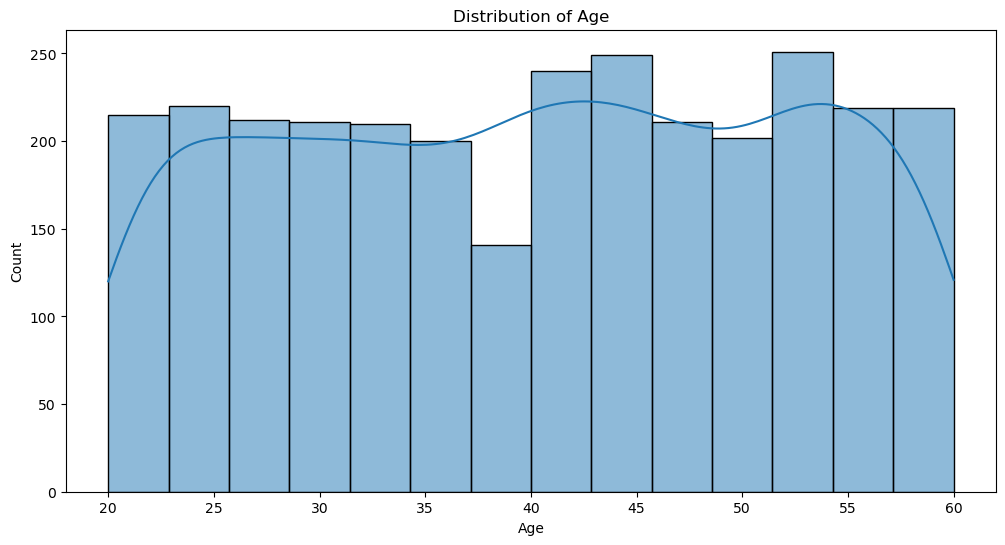

In [219]:
plt.figure(figsize=(12, 6))
sns.histplot(data=db_num, x="Age", kde=True)
plt.title("Distribution of Age")
plt.show()

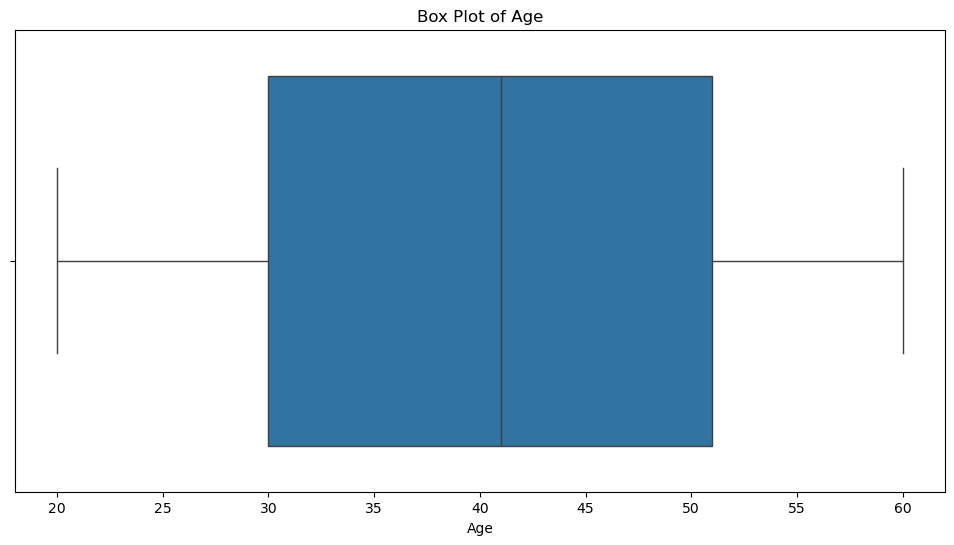

In [221]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=db_num, x="Age")
plt.title("Box Plot of Age")
plt.show()

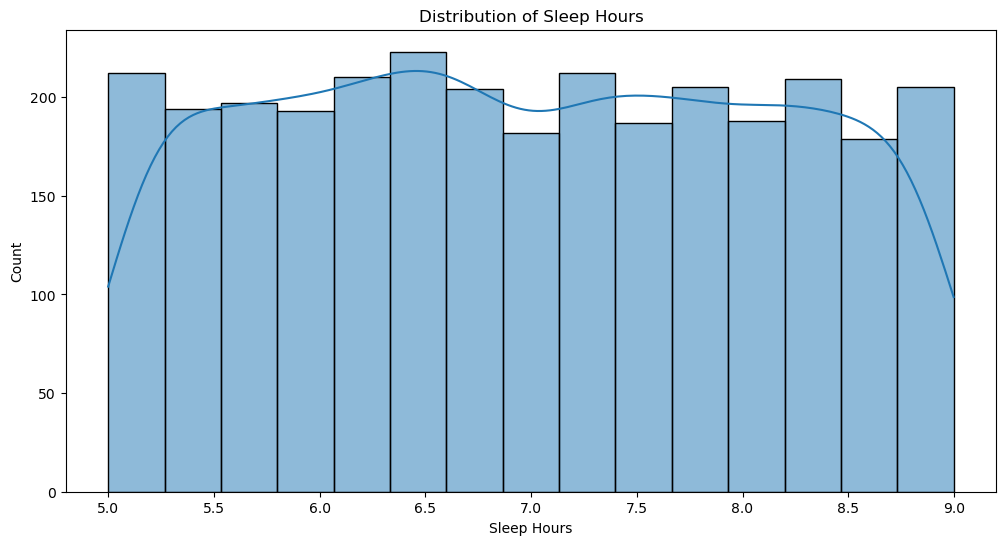

In [223]:
plt.figure(figsize=(12, 6))
sns.histplot(data=db_num, x="Sleep Hours", kde=True)
plt.title("Distribution of Sleep Hours")
plt.show()

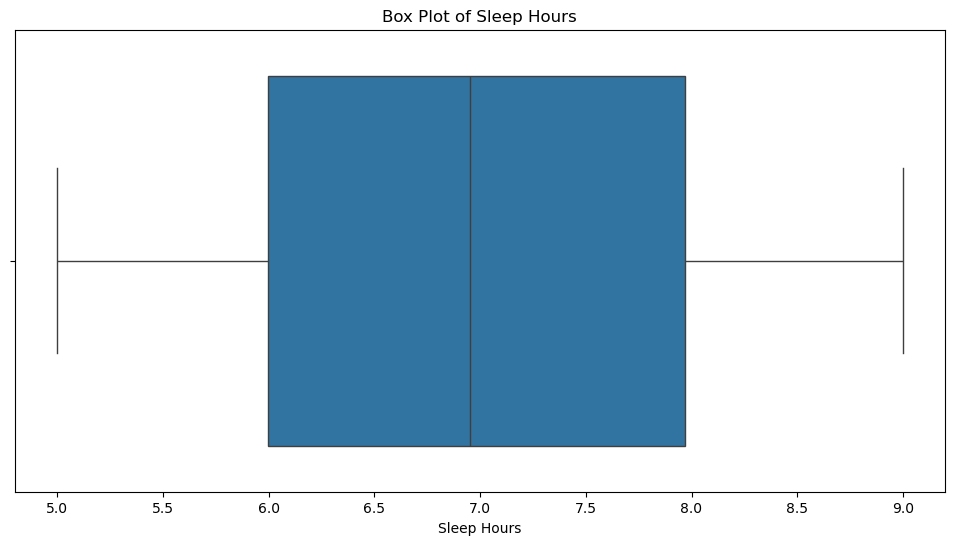

In [225]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=db_num, x="Sleep Hours")
plt.title("Box Plot of Sleep Hours")
plt.show()

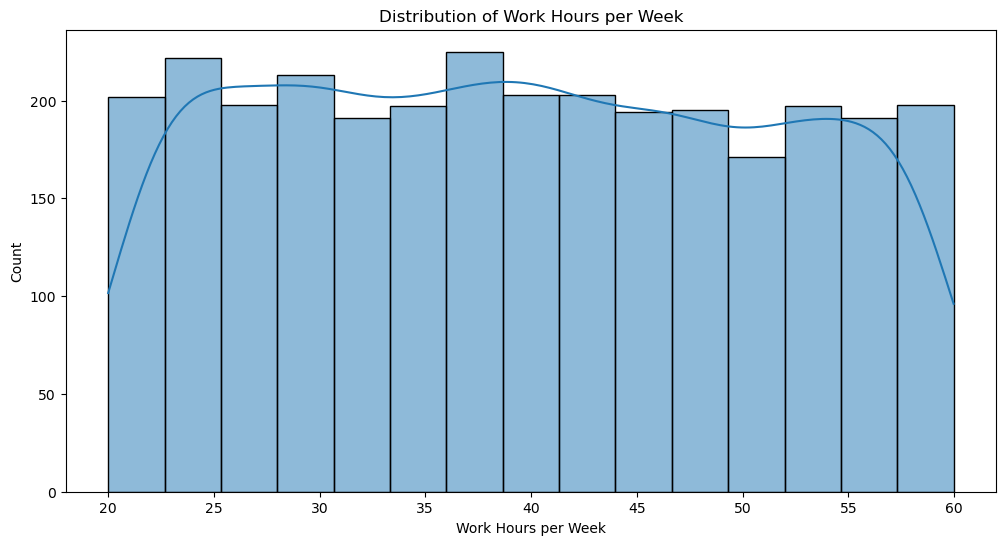

In [227]:
plt.figure(figsize=(12, 6))
sns.histplot(data=db_num, x="Work Hours per Week", kde=True)
plt.title("Distribution of Work Hours per Week")
plt.show()

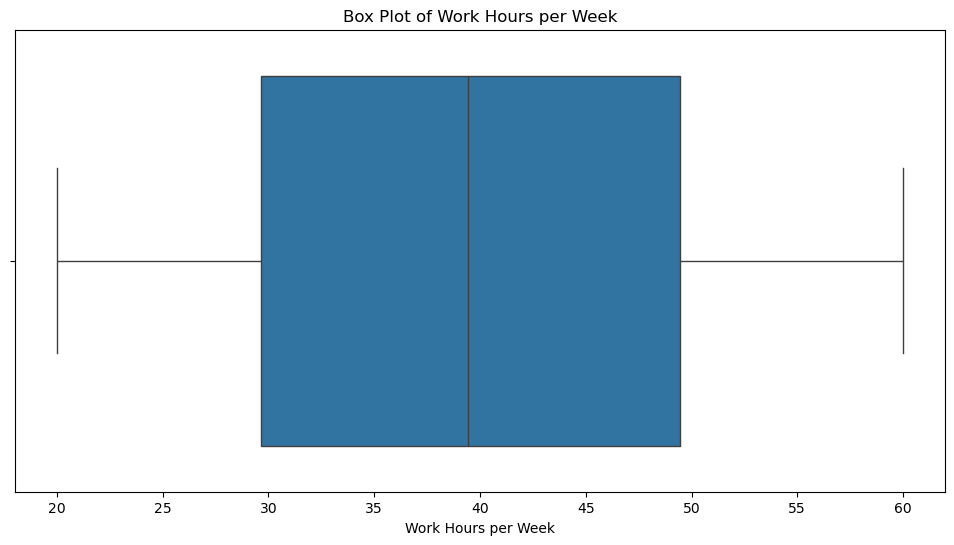

In [229]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=db_num, x="Work Hours per Week")
plt.title("Box Plot of Work Hours per Week")
plt.show()

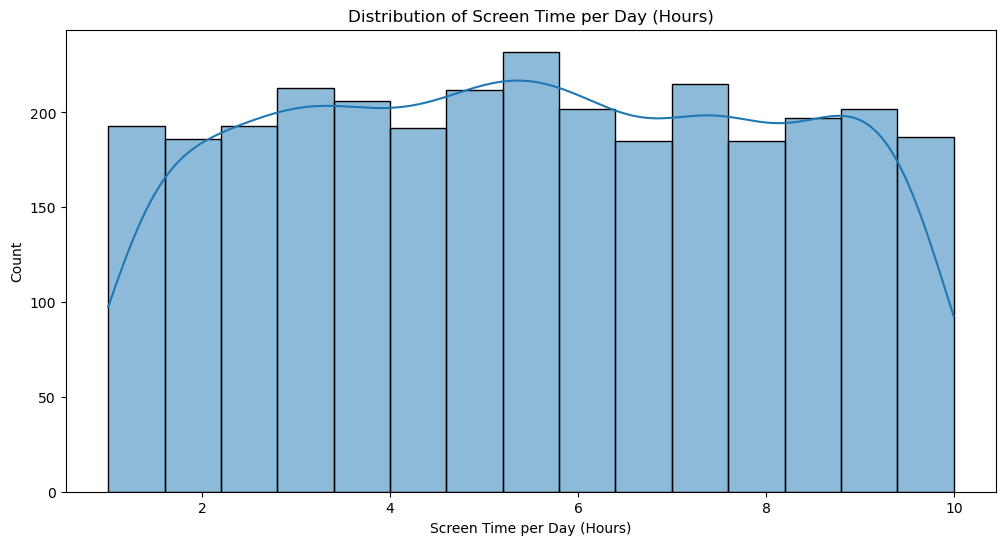

In [231]:
plt.figure(figsize=(12, 6))
sns.histplot(data=db_num, x="Screen Time per Day (Hours)", kde=True)
plt.title("Distribution of Screen Time per Day (Hours)")
plt.show()

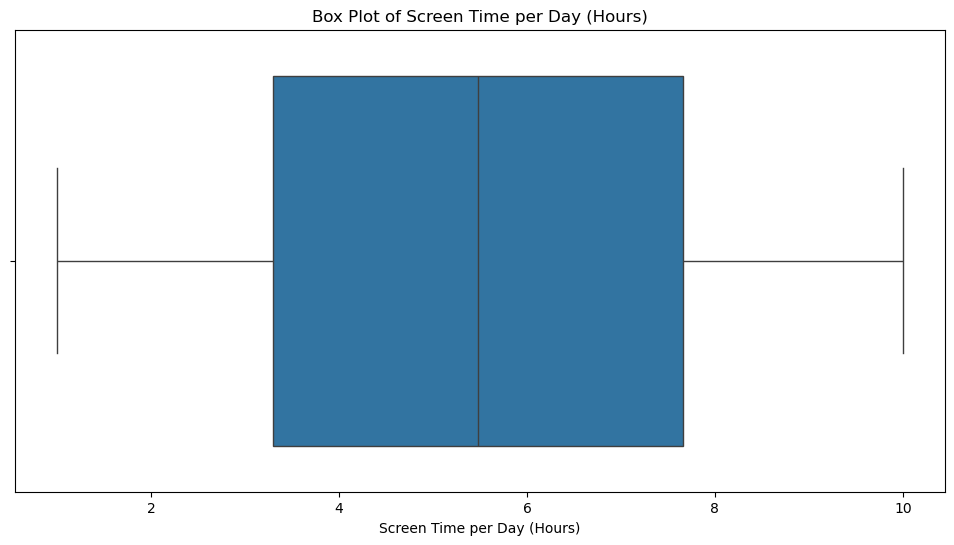

In [233]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=db_num, x="Screen Time per Day (Hours)")
plt.title("Box Plot of Screen Time per Day (Hours)")
plt.show()

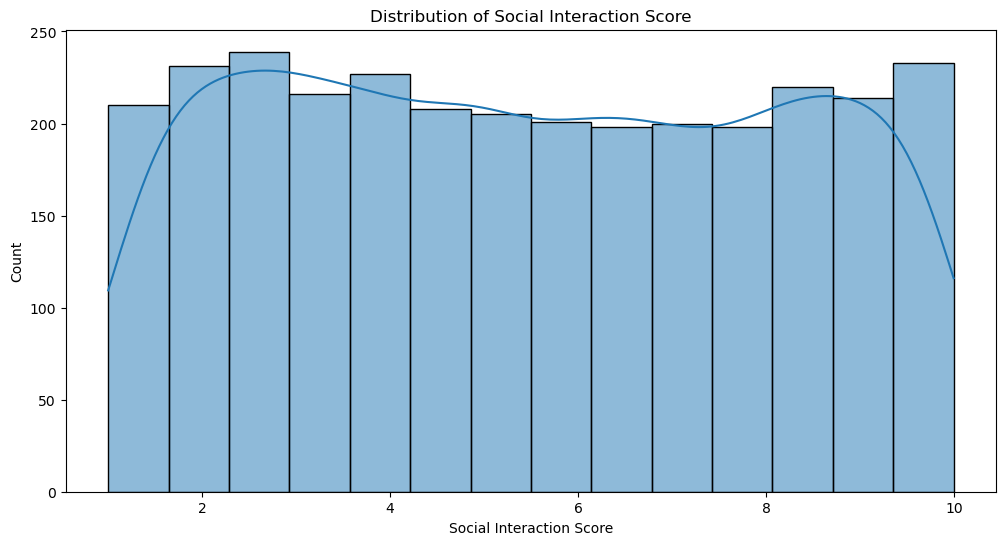

In [235]:
plt.figure(figsize=(12, 6))
sns.histplot(data=db_num, x="Social Interaction Score", kde=True)
plt.title("Distribution of Social Interaction Score")
plt.show()

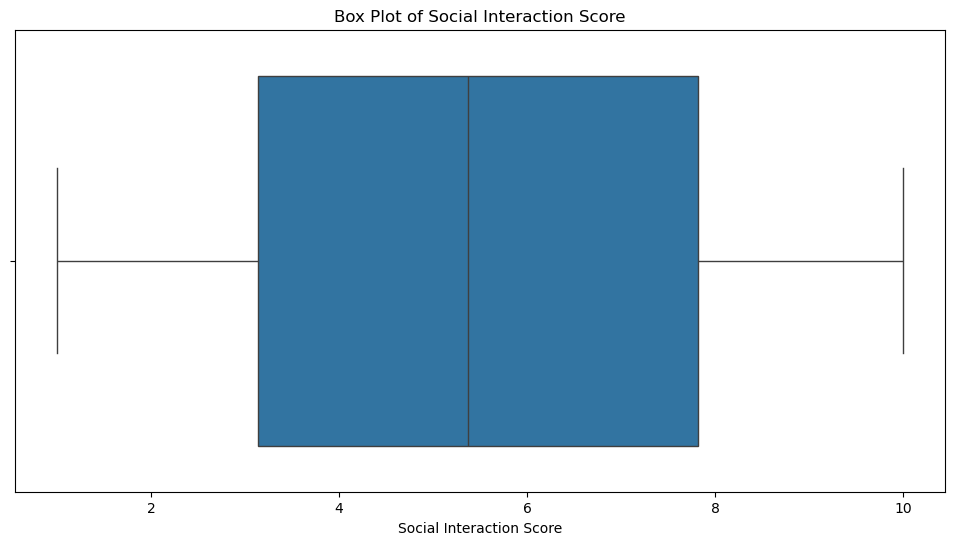

In [236]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=db_num, x="Social Interaction Score")
plt.title("Box Plot of Social Interaction Score")
plt.show()

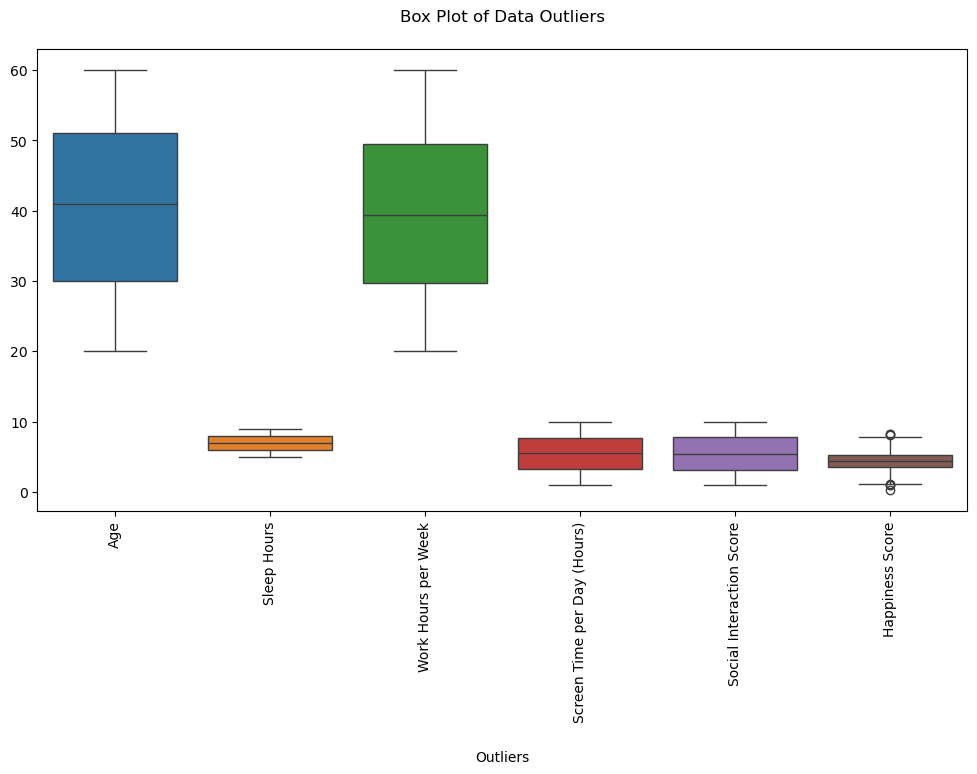

In [239]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=db_num)
plt.title('Box Plot of Data Outliers', pad=20)
plt.xticks(rotation=90)
plt.xlabel('Outliers', labelpad=20)
plt.show()

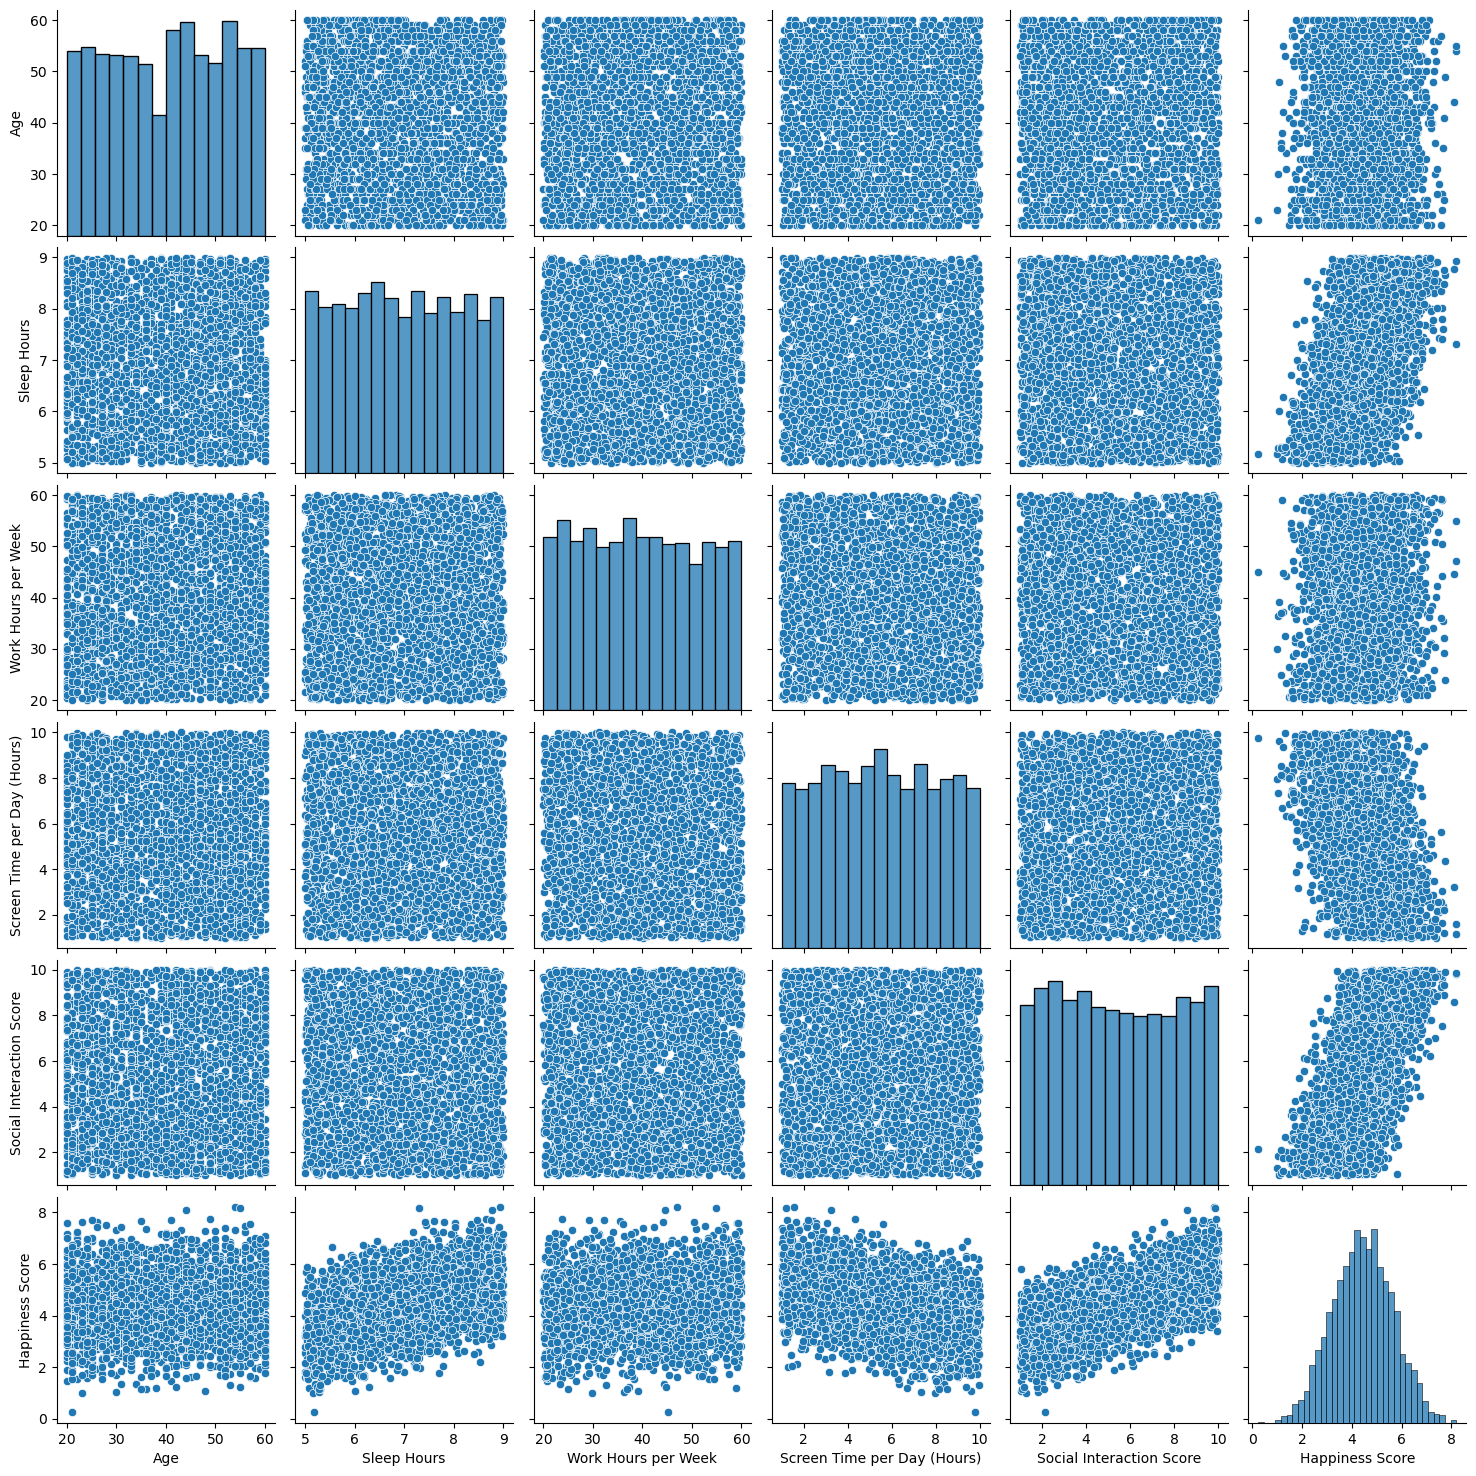

In [240]:
sns.pairplot(db_num)
plt.show()

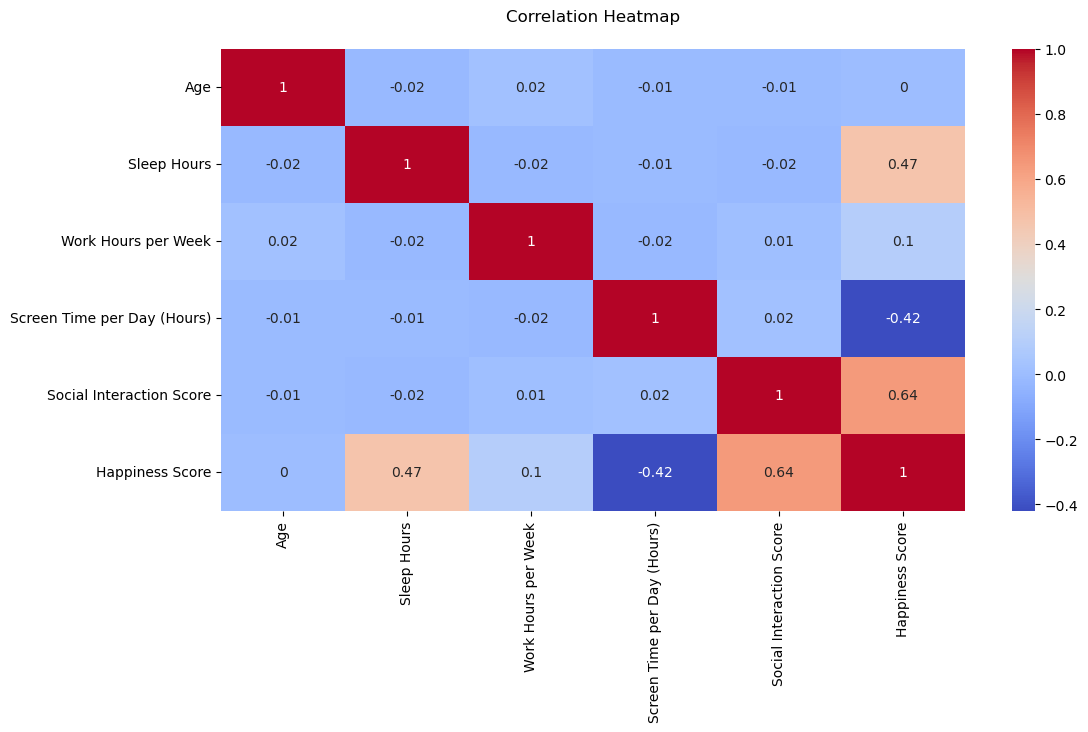

In [377]:
plt.figure(figsize=(12, 6))
corr = db_num.corr().round(2)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", pad=20)
plt.show()

In [407]:
##### Hypothesis Analysis

Hypothesis	r	p‑value	Result

H1: More Sleep Hours → Higher Happiness Score	

H2: More Social Interaction → Higher Happiness Score	

H3: More Screen Time → Lower Happiness Score

If p_value < 0.05, reject H₀ → there is significant evidence of correlation.


If p_value ≥ 0.05, fail to reject H₀ → no strong evidence of linear correlation. 

In [419]:
from scipy.stats import pearsonr

predictors = ['Sleep Hours', 'Social Interaction Score', 'Screen Time per Day (Hours)']

for var in predictors:
    r, p = pearsonr(db[var], db['Happiness Score'])
    print(f"{var:30s}  r = {r: .4f}, p‑value = {p:.3e}")


Sleep Hours                     r =  0.4748, p‑value = 1.627e-168
Social Interaction Score        r =  0.6381, p‑value = 0.000e+00
Screen Time per Day (Hours)     r = -0.4160, p‑value = 7.001e-126


We reject H1. There is a moderate, statistically significant positive correlation between hours of sleep and Happiness Score. More sleep is reliably associated with greater happiness.

We reject H2. There is a strong, statistically significant positive correlation between social interaction and Happiness Score. Higher levels of social engagement correspond to notably higher happiness.

We reject H3. There is a moderate, statistically significant negative correlation between daily screen time and Happiness Score. More time spent on screens is associated with lower levels of happiness.

In [429]:
#Select Hapiness Score (variable)

X = db_num[['Sleep Hours', 'Social Interaction Score', 'Screen Time per Day (Hours)']]
y = db_num['Happiness Score']

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [247]:
model.coef_

array([ 0.00118911,  0.50050304,  0.00997099, -0.19426136,  0.29938584])

In [260]:
model.intercept_

-0.07196913184818587

In [263]:
model.score(X,y)

0.8278795563495794

In [265]:
y_train_pred = model.predict(X_train)

In [267]:
y_train_pred

array([4.95736905, 3.77012679, 4.21609343, ..., 3.50367743, 5.27912479,
       2.84739192])

In [269]:
y_pred = model.predict(X_test)

In [271]:
y_pred

array([4.10358061, 3.33880554, 3.08836639, 3.40334262, 2.95508456,
       4.37931233, 3.00845014, 4.73338918, 4.00898481, 3.65053703,
       4.87689202, 5.57569626, 3.20350179, 5.44100215, 5.6998153 ,
       5.15818495, 4.24723061, 3.45027171, 1.83593909, 2.08467613,
       2.12581672, 6.49083029, 4.40667948, 4.38354913, 4.35496229,
       3.61638109, 5.98469344, 5.20846878, 4.91040728, 6.50607003,
       4.19295424, 5.06116946, 5.50015591, 5.84497733, 4.87448053,
       5.1630152 , 4.39702455, 5.39656742, 4.81411778, 3.8137614 ,
       6.54701227, 5.58901902, 4.84052373, 4.85347289, 3.63364387,
       5.38616685, 4.11131218, 4.44038016, 4.27658735, 3.25121424,
       5.82048337, 3.5385004 , 4.01882046, 3.9623013 , 5.1560755 ,
       5.21428736, 4.75284386, 5.38659142, 5.27663708, 3.86579558,
       4.47165623, 6.31158816, 2.80268748, 3.37149939, 3.72128914,
       4.44206509, 2.77433034, 3.32726598, 5.21895742, 5.5620401 ,
       4.7267143 , 3.93823269, 4.09952524, 3.82320924, 4.68637

In [437]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.8283523442739186
RMSE: 0.5001262385683988


In [443]:
coef_db = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_db)

                      Features  Coefficient
1                  Sleep Hours     0.500503
4     Social Interaction Score     0.299386
3  Screen Time per Day (Hours)    -0.194261
2          Work Hours per Week     0.009971
0                          Age     0.001189
